CNN algorithm, it's just for learning

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import shutil
import glob

In [2]:
!wget https://www.dropbox.com/scl/fi/yj8rbz1y52cbc0a57r0jo/archive.zip?rlkey=s2yud9avxkt3icgvsr5tycqmm&dl=0
!unzip /content/archive.zip?rlkey=s2yud9avxkt3icgvsr5tycqmm&dl=0


--2024-02-10 10:31:20--  https://www.dropbox.com/scl/fi/yj8rbz1y52cbc0a57r0jo/archive.zip?rlkey=s2yud9avxkt3icgvsr5tycqmm
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3b7dd38be31dde9b0b573cd848.dl.dropboxusercontent.com/cd/0/inline/CND3wR-lKbqZVa-fqjnmHGLYgFyH_q_gq87DQmA1WMBvKINKcDj2KDoYp9GsdxFTvfvzMqHNvIEc-IH2Doeo0AiWdMoKtR15OOMyBmNXPkJX0Iw8OQaEwOegZ8Uyv9OMriFOVZnmuVbOsWH8-EqmrULa/file# [following]
--2024-02-10 10:31:21--  https://uc3b7dd38be31dde9b0b573cd848.dl.dropboxusercontent.com/cd/0/inline/CND3wR-lKbqZVa-fqjnmHGLYgFyH_q_gq87DQmA1WMBvKINKcDj2KDoYp9GsdxFTvfvzMqHNvIEc-IH2Doeo0AiWdMoKtR15OOMyBmNXPkJX0Iw8OQaEwOegZ8Uyv9OMriFOVZnmuVbOsWH8-EqmrULa/file
Resolving uc3b7dd38be31dde9b0b573cd848.dl.dropboxusercontent.com (uc3b7dd38be31dde9b0b573cd848.dl.dropboxusercontent.com)... 162.125.64.15, 2620

In [3]:
TRAIN_DIR = "./DATASET"

In [4]:
ORG_DIR = "/content/is that santa/train/not-a-santa"

In [5]:
CLASS = ['Santa','Not-a-Santa']

In [6]:


for C in CLASS:
   DEST = os.path.join(TRAIN_DIR,C)
   # if directory is not present than create one
   if not os.path.exists(DEST):
    os.makedirs(DEST)
   for img_path in glob.glob(os.path.join(ORG_DIR,C)+"*"):
    SRC = img_path
    shutil.copy(SRC,DEST)

In [7]:
os.listdir("/content/is that santa/train/not-a-santa")

['65.not-a-santa.jpg',
 '149.not-a-santa.jpg',
 '66.not-a-santa.jpg',
 '213.not-a-santa.jpg',
 '613.not-a-santa.jpg',
 '214.not-a-santa.jpg',
 '286.not-a-santa.jpg',
 '233.not-a-santa.jpg',
 '551.not-a-santa.jpg',
 '333.not-a-santa.jpg',
 '185.not-a-santa.jpg',
 '306.not-a-santa.jpg',
 '186.not-a-santa.jpg',
 '288.not-a-santa.jpg',
 '126.not-a-santa.jpg',
 '379.not-a-santa.jpg',
 '274.not-a-santa.jpg',
 '322.not-a-santa.jpg',
 '304.not-a-santa.jpg',
 '55.not-a-santa.jpg',
 '317.not-a-santa.jpg',
 '517.not-a-santa.jpg',
 '182.not-a-santa.jpg',
 '282.not-a-santa.jpg',
 '541.not-a-santa.jpg',
 '216.not-a-santa.jpg',
 '165.not-a-santa.jpg',
 '320.not-a-santa.jpg',
 '600.not-a-santa.jpg',
 '155.not-a-santa.jpg',
 '358.not-a-santa.jpg',
 '227.not-a-santa.jpg',
 '240.not-a-santa.jpg',
 '81.not-a-santa.jpg',
 '359.not-a-santa.jpg',
 '573.not-a-santa.jpg',
 '36.not-a-santa.jpg',
 '406.not-a-santa.jpg',
 '143.not-a-santa.jpg',
 '594.not-a-santa.jpg',
 '362.not-a-santa.jpg',
 '204.not-a-santa.jpg

Building a Model


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import keras

In [9]:
base_model = InceptionV3(input_shape = (512,512,3), include_top = False)

87910968/87910968 [==============================] - 1s 0us/step


In [10]:
for layer in base_model.layers:
  layer.trainable = False

In [11]:

X = Flatten()(base_model.output)
X = Dense(units=2,activation = 'sigmoid')(X)
#Final Model
model = Model(base_model.input,X)
# compile the model
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy,metrics = ['accuracy'])
# summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 255, 255, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 255, 255, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 255, 255, 32)         0         ['batch_normalization[0][0

Pre-Process data using Data Generator

In [12]:
train_datagen = ImageDataGenerator(featurewise_center = True,
                                   rotation_range = 0.4,
                                   width_shift_range = 0.3,
                                   horizontal_flip = True,
                                   preprocessing_function =preprocess_input,
                                   zoom_range =0.4,
                                   shear_range = 0.4 )

In [13]:
train_data = train_datagen.flow_from_directory(directory ="/content/is that santa/train",
                                               target_size = (512,512),
                                               batch_size=64 )

Found 614 images belonging to 2 classes.


In [14]:
train_data.class_indices

{'not-a-santa': 0, 'santa': 1}

Visualizing the data

In [15]:
t_img,label = train_data.next()

In [16]:
t_img.shape

(64, 512, 512, 3)

In [17]:
def plotImages(img_arr,label):
  """
  input: image array
  output: plot images
  """
  for idx, img in enumerate(img_arr):
    if idx <=10:
      plt.figure(figsize = (5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()



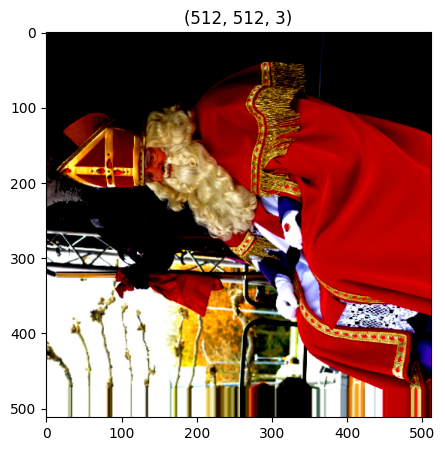

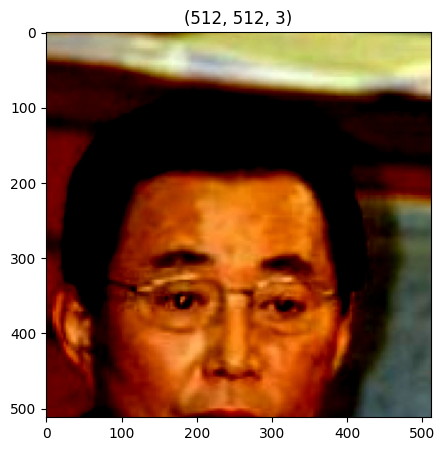

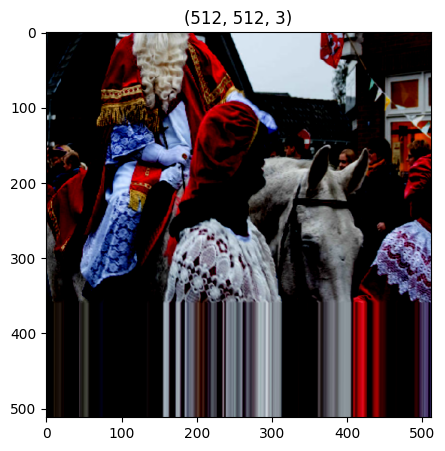

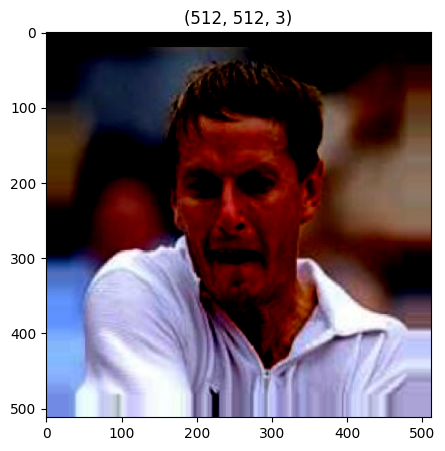

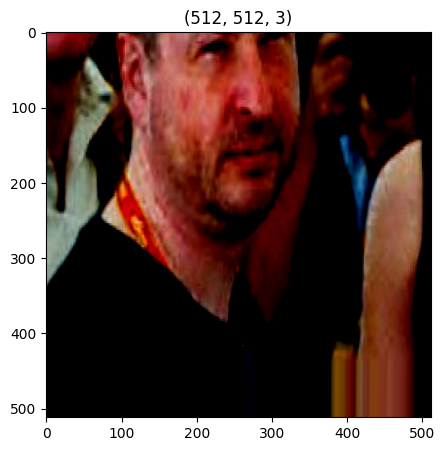

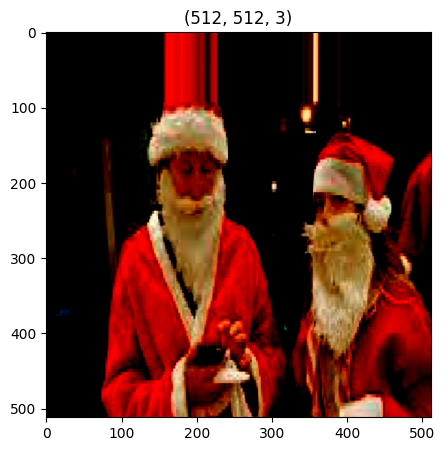

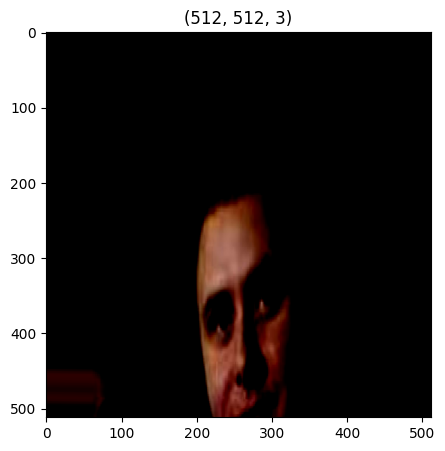

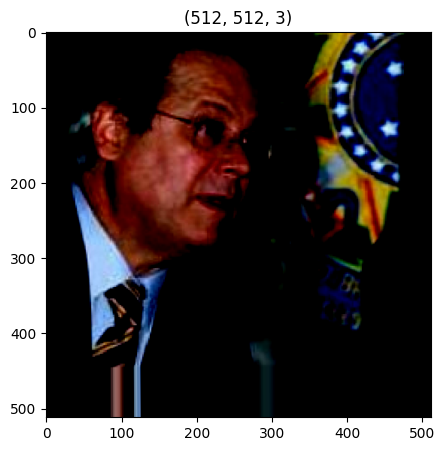

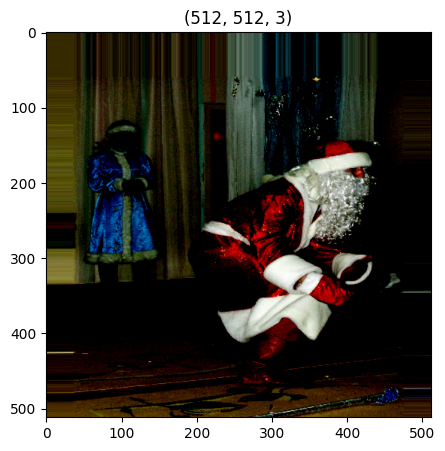

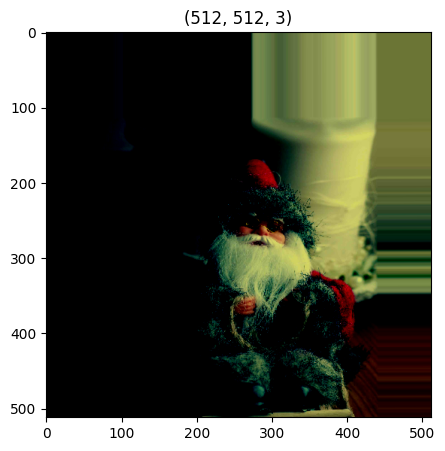

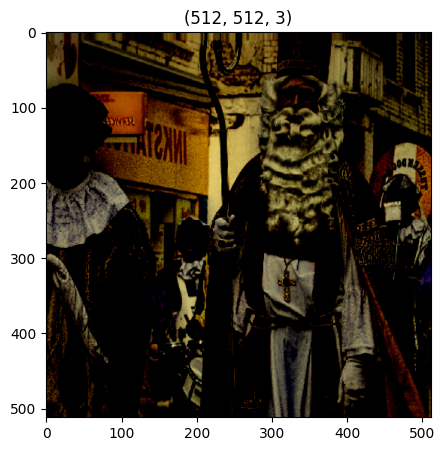

In [18]:
plotImages(t_img,label)

Model Checkpoint

In [19]:

from keras.callbacks import ModelCheckpoint, EarlyStopping
mc = ModelCheckpoint(filepath = "./best_model.h5",
                     monitor = 'accuracy',
                     verbose = 1,
                     save_best_only = True )
es = EarlyStopping(monitor='accuracy',
                   min_delta = 0.01,
                   patience = 5,
                   verbose = 1)
cb =[mc,es]

In [20]:
his = model.fit_generator(train_data, steps_per_epoch = 10, epochs = 30, callbacks = cb)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 8.5741 - accuracy: 0.6612
Epoch 1: accuracy improved from -inf to 0.66124, saving model to ./best_model.h5
10/10 [==============================] - 65s 4s/step - loss: 8.5741 - accuracy: 0.6612
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 2.0584 - accuracy: 0.8795
Epoch 2: accuracy improved from 0.66124 to 0.87948, saving model to ./best_model.h5
10/10 [==============================] - 43s 4s/step - loss: 2.0584 - accuracy: 0.8795
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 1.3838 - accuracy: 0.8893
Epoch 3: accuracy improved from 0.87948 to 0.88925, saving model to ./best_model.h5
10/10 [==============================] - 44s 4s/step - loss: 1.3838 - accuracy: 0.8893
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 1.1108 - accuracy: 0.9186
Epoch 4: accuracy improved from 0.88925 to 0.91857, saving model to ./best_model.h5
10/10 [=======================

In [21]:
from keras.models import load_model

In [22]:
model = load_model("/content/best_model.h5")

In [23]:
h = his.history
h.keys()


dict_keys(['loss', 'accuracy'])

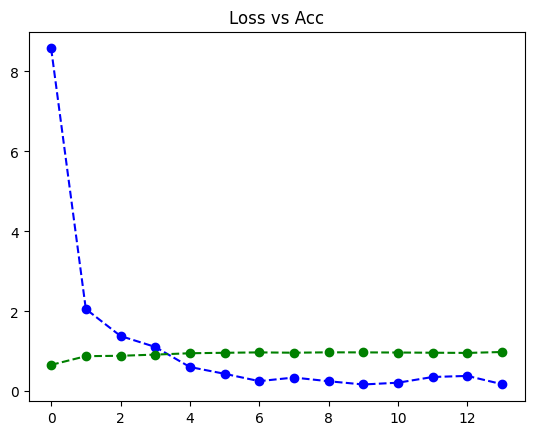

In [24]:
plt.plot(h['loss'], 'go--',c='blue')
plt.plot(h['accuracy'],'go--',c = 'green')
plt.title("Loss vs Acc")
plt.show()

Validate Our Model

1/1 [==============================] - 3s 3s/step


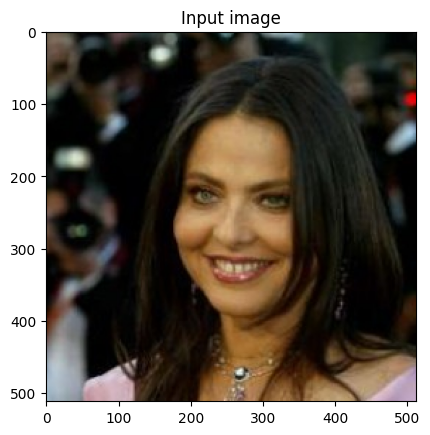

The image is not a Santa.


In [25]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt


# Load and preprocess the image
path = "/content/is that santa/test/not-a-santa/107.not-a-santa.jpg"
img = load_img(path, target_size=(512, 512))
input_arr = img_to_array(img)
input_arr = preprocess_input(input_arr)
input_arr = np.expand_dims(input_arr, axis=0)

# Predict the class
pred = np.argmax(model.predict(input_arr))

# Display the image
plt.imshow(img)
plt.title("Input image")
plt.axis=False  # Turn off axis labels

plt.show()

# Print the prediction result
if pred == 0:
    print("The image is not a Santa.")
else:
    print("The image is a Santa.")


SVM Moodel to predict

In [26]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

num_steps = 10

train_features = []
train_labels = []

for step in range(num_steps):
    images, labels = next(train_data)
    features = model.predict(images)
    train_features.append(features)
    train_labels.append(labels)

train_features = np.vstack(train_features)
train_labels = np.vstack(train_labels)

train_features_flatten = train_features.reshape(train_features.shape[0], -1)

scaler = StandardScaler()
train_features_standardized = scaler.fit_transform(train_features_flatten)

X_train, X_test, y_train, y_test = train_test_split(train_features_standardized, train_labels, test_size=0.2, random_state=42)

clf = svm.SVC(kernel='linear')

clf.fit(X_train, np.argmax(y_train, axis=1))

y_pred = clf.predict(X_test)

accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print('\nClassification Report:\n', classification_report(np.argmax(y_test, axis=1), y_pred))


2/2 [==============================] - 1s 378ms/step
Accuracy: 98.37%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.98      0.98      0.98        59

    accuracy                           0.98       123
   macro avg       0.98      0.98      0.98       123
weighted avg       0.98      0.98      0.98       123



1/1 [==============================] - 0s 26ms/step


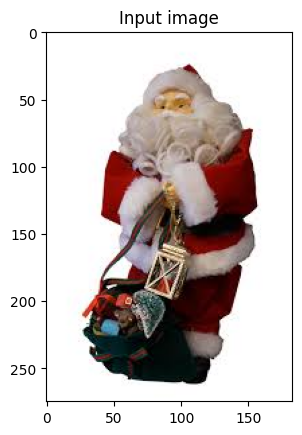

The image is Santa.


In [27]:
from PIL import Image
from keras.preprocessing.image import img_to_array, load_img
from sklearn.preprocessing import StandardScaler

def preprocess_single_image(img_path, scaler):
    img = load_img(img_path, target_size=(512, 512))
    img_array = img_to_array(img)
    img_array = img_array.reshape((1, img_array.shape[0], img_array.shape[1], img_array.shape[2]))

    features = model.predict(preprocess_input(img_array))

    features_flatten = features.reshape(1, -1)
    features_standardized = scaler.transform(features_flatten)

    return features_standardized

image_path = "/content/is that santa/test/santa/104.Santa.jpg"

single_image_features = preprocess_single_image(image_path, scaler)

prediction = clf.predict(single_image_features)

img = Image.open(image_path)
plt.imshow(img)
plt.title("Input image")
plt.axis = None
plt.show()

if prediction == 0:
    print("The image is not Santa.")
else:
    print("The image is Santa.")


Logistic Regression algorithm to classify if its Santa or Not a Santa

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
train_features = []
train_labels = []

num_steps = 10

for step in range(num_steps):
    images, labels = next(train_data)
    features = model.predict(images)
    train_features.append(features)
    train_labels.append(labels)

train_features = np.vstack(train_features)
train_labels = np.argmax(np.vstack(train_labels), axis=1)

X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

clf_lr = LogisticRegression()

scaler_lr = StandardScaler()
X_train_standardized = scaler_lr.fit_transform(X_train)
X_test_standardized = scaler_lr.transform(X_test)

clf_lr.fit(X_train_standardized, y_train)

y_pred_lr = clf_lr.predict(X_test_standardized)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%')

print('\nLogistic Regression Classification Report:\n', classification_report(y_test, y_pred_lr))


2/2 [==============================] - 1s 374ms/step
Logistic Regression Accuracy: 98.37%

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        62
           1       0.97      1.00      0.98        61

    accuracy                           0.98       123
   macro avg       0.98      0.98      0.98       123
weighted avg       0.98      0.98      0.98       123



1/1 [==============================] - 0s 27ms/step


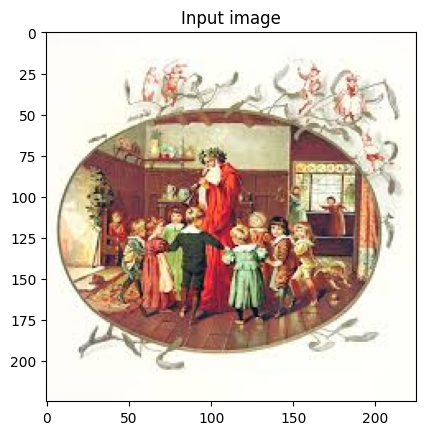

Logistic Regression predicts: The image is Santa.


In [29]:
from PIL import Image
from keras.preprocessing.image import img_to_array, load_img
from sklearn.preprocessing import StandardScaler

def preprocess_single_image(img_path, model, scaler):
    img = load_img(img_path, target_size=(512, 512))
    img_array = img_to_array(img)
    img_array = img_array.reshape((1, img_array.shape[0], img_array.shape[1], img_array.shape[2]))

    features = model.predict(preprocess_input(img_array))

    features_flatten = features.reshape(1, -1)
    features_standardized = scaler.transform(features_flatten)

    return features_standardized

image_path = "/content/is that santa/test/santa/105.Santa.jpg"

single_image_features = preprocess_single_image(image_path, model, scaler_lr)

prediction_lr = clf_lr.predict(single_image_features)

img = Image.open(image_path)
plt.imshow(img)
plt.title("Input image")
plt.axis = None
plt.show()

if prediction_lr == 0:
    print("Logistic Regression predicts: The image is not Santa.")
else:
    print("Logistic Regression predicts: The image is Santa.")


KNN algorithm to classify its Santa or not

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
train_features = []
train_labels = []

num_steps = 10

for step in range(num_steps):
    images, labels = next(train_data)
    features = model.predict(images)
    train_features.append(features)
    train_labels.append(labels)

train_features = np.concatenate(train_features, axis=0)
train_labels = np.argmax(np.concatenate(train_labels, axis=0), axis=1)

X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

scaler_knn = StandardScaler()
X_train_standardized = scaler_knn.fit_transform(X_train)
X_test_standardized = scaler_knn.transform(X_test)

knn.fit(X_train_standardized, y_train)

y_pred_knn = knn.predict(X_test_standardized)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn * 100:.2f}%')

print('\nKNN Classification Report:\n', classification_report(y_test, y_pred_knn))


2/2 [==============================] - 1s 401ms/step
KNN Accuracy: 100.00%

KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        57

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



1/1 [==============================] - 0s 31ms/step


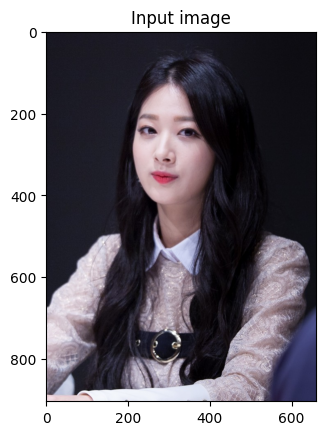

KNN predicts: The image is not Santa.


In [31]:
from PIL import Image
from keras.preprocessing.image import img_to_array, load_img
from sklearn.preprocessing import StandardScaler

def preprocess_single_image(img_path, model, scaler):
    img = load_img(img_path, target_size=(512, 512))
    img_array = img_to_array(img)
    img_array = img_array.reshape((1, img_array.shape[0], img_array.shape[1], img_array.shape[2]))

    features = model.predict(preprocess_input(img_array))

    features_flatten = features.reshape(1, -1)
    features_standardized = scaler.transform(features_flatten)

    return features_standardized

image_path = "/content/is that santa/test/not-a-santa/110.not-a-santa.jpg"

single_image_features = preprocess_single_image(image_path, model, scaler_knn)

prediction_knn = knn.predict(single_image_features)

img = Image.open(image_path)
plt.imshow(img)
plt.title("Input image")
plt.axis = None
plt.show()

if prediction_knn == 0:
    print("KNN predicts: The image is not Santa.")
else:
    print("KNN predicts: The image is Santa.")


1/1 [==============================] - 0s 99ms/step


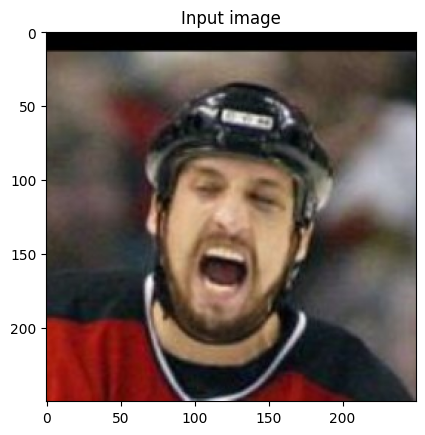

Custom KNN predicts: The image is not Santa.


In [33]:
import numpy as np
from PIL import Image
from keras.preprocessing.image import img_to_array, load_img
from sklearn.preprocessing import StandardScaler

# Function to calculate Euclidean distance between two vectors
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Function to implement k-Nearest Neighbors
def knn_predict(X_train, y_train, x_test, k):
    distances = []
    for i in range(X_train.shape[0]):
        dist = euclidean_distance(x_test, X_train[i])
        distances.append((dist, y_train[i]))

    distances = sorted(distances, key=lambda x: x[0])
    neighbors = distances[:k]

    # Count the occurrences of each class in the k-nearest neighbors
    class_votes = {}
    for neighbor in neighbors:
        label = neighbor[1]
        if label in class_votes:
            class_votes[label] += 1
        else:
            class_votes[label] = 1

    # Choose the class with the most votes
    prediction = max(class_votes, key=class_votes.get)
    return prediction

# Provide the path to the image you want to predict
image_path = "/content/is that santa/test/not-a-santa/111.not-a-santa.jpg"

# Preprocess the single image
single_image_features = preprocess_single_image(image_path, model, scaler_knn)

# Make predictions using the implemented KNN
prediction_knn_custom = knn_predict(X_train_standardized, y_train, single_image_features.flatten(), k=3)

# Display the original image
img = Image.open(image_path)
plt.imshow(img)
plt.title("Input image")
plt.axis = None
plt.show()

# Print the prediction result
if prediction_knn_custom == 0:
    print("Custom KNN predicts: The image is not Santa.")
else:
    print("Custom KNN predicts: The image is Santa.")
